In [25]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/Colab Notebooks/'
arima_data = pd.read_csv(data_path + 'conformal_results010.csv')
bnn_data = pd.read_csv(data_path + 'conformal_bnn_results.csv')
price_data = pd.read_csv(data_path + 'aggregated_data_10_minute_intervals.csv')


all_data = pd.read_csv(data_path + 'allData.csv')
arima_data = all_data[['arima pred','arima low after rolling cp', 'arima high after rolling cp' ]]
bnn_data = all_data[['bnn pred','bnn low after rolling cp', 'bnn high after rolling cp' ]]
price_data = all_data[['true y']]

arima_keys = {'arima pred': 'pred', 'arima low after rolling cp': 'lower', 'arima high after rolling cp': 'upper'}
bnn_keys = {'bnn pred': 'pred', 'bnn low after rolling cp': 'lower', 'bnn high after rolling cp': 'upper'}
arima_data = arima_data.rename(columns=arima_keys)
bnn_data = bnn_data.rename(columns=bnn_keys)
all_data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,true y,arima pred,arima low before cp,arima high before cp,bnn pred,bnn low before cp,bnn high before cp,arima low after rolling cp,arima high after rolling cp,bnn low after rolling cp,bnn high after rolling cp,arima low after bad cp,arima high after bad cp,bnn low after bad cp,bnn high after bad cp
0,1000,47346.615,47315.350283,47068.755418,47561.945147,47296.770,44134.960,49101.810,47101.126399,47529.574167,45371.74429,47865.02571,47112.799934,47517.900631,45373.382835,47863.387165
1,1001,47318.435,47315.992748,47069.408047,47562.577449,47218.836,44060.645,49023.277,47101.779028,47530.206469,45297.42929,47786.49271,47113.452563,47518.532934,45299.067835,47784.854165
2,1002,47353.605,47280.592777,47034.018694,47527.166861,47202.430,44044.477,49006.297,47066.389674,47494.795881,45281.26129,47769.51271,47078.063210,47483.122345,45282.899835,47767.874165
3,1003,47398.955,47372.212974,47125.646973,47618.778974,47179.980,44023.395,48983.293,47158.017953,47586.407994,45260.17929,47746.50871,47169.691489,47574.734458,45261.817835,47744.870165
4,1004,47326.995,47417.467005,47170.911284,47664.022727,47178.996,44020.940,48981.445,47203.282264,47631.651746,45257.72429,47744.66071,47214.955800,47619.978211,45259.362835,47743.022165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,4501,42994.385,42960.344730,42696.200210,43224.489249,42668.965,39830.240,44290.700,42550.165079,43370.524380,40833.11431,43287.82569,42740.244726,43180.444733,41068.662835,43052.277165
3502,4502,42854.565,43026.602721,42762.466542,43290.738900,42677.610,39839.790,44299.260,42616.431410,43436.774032,40842.66431,43296.38569,42806.511058,43246.694384,41078.212835,43060.837165
3503,4503,42949.675,42831.880655,42567.743175,43096.018135,42670.600,39831.566,44292.848,42421.708043,43242.053267,40834.44031,43289.97369,42611.787691,43051.973619,41069.988835,43054.425165
3504,4504,42881.335,42978.900739,42714.767306,43243.034173,42630.920,39794.406,44252.023,42568.732174,43389.069305,40797.28031,43249.14869,42758.811822,43198.989657,41032.828835,43013.600165


In [62]:
def confidence_interval_gap(upper, lower):
    return upper - lower 

def confidence_interval_change(upper, lower, std_series):
    #The lower the better 
    delta_ci = upper - lower 
    diff = []
    for i in range(std.keys().start, std.keys().stop-1):
        num = (delta_ci.loc[i+1] - delta_ci.loc[i])/delta_ci.loc[i]
        denom = (std.loc[i+1] - std.loc[i])/std.loc[i]
        diff.append(num*denom)
    #return -1 * sum(diff)
    return diff

def expected_value_of_ci_change(upper, lower, std_series):
    #Put emphasis on the region of confidence interval that have large variance, and exaime the gap
    #The better ci is one that have small difference in places where the variance is high
    delta_ci = upper - lower 
    exp = []
    normalization = 0
    for i in range(std.keys().start, std.keys().stop-1):
        exp.append(delta_ci.loc[i] * std.loc[i])
        normalization += std.loc[i]
    return np.array(exp)/normalization 

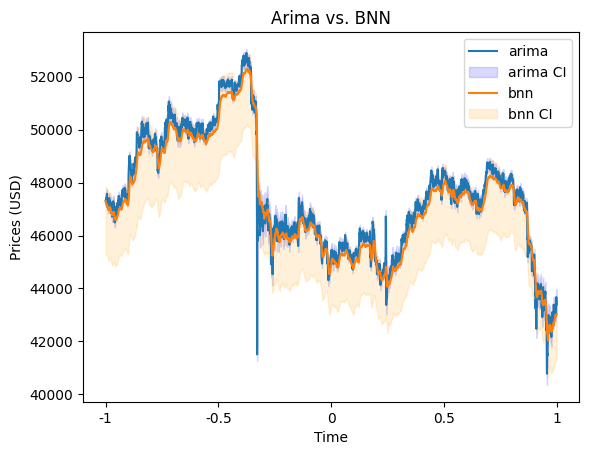

In [96]:
start = 0
end = 3000
plt.plot(arima_data['pred'][start:end], label='arima')
plt.fill_between(arima_data.index[start:end], arima_data['lower'][start:end], arima_data['upper'][start:end], 
                 color='blue', alpha=.15, label='arima CI')
#plt.show()
plt.plot(bnn_data['pred'][start:end], label='bnn')
plt.fill_between(bnn_data.index[start:end], bnn_data['lower'][start:end], bnn_data['upper'][start:end], 
                 color='orange', alpha=.15, label='bnn CI')

plt.legend()
plt.title('Arima vs. BNN')
plt.ylabel('Prices (USD)')
plt.xlabel('Time')
plt.xticks(np.linspace(start, end, 5),[-1, -0.5, 0, 0.5, 1])
plt.legend()
plt.savefig(data_path + 'Arima vs. BNN.png')
plt.show()

Arima gap sum 1250495.0151989993
BNN gap sum 7052472.5093599865


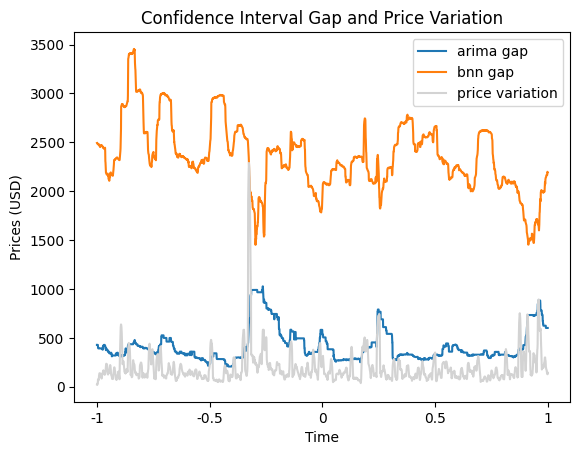

In [86]:
#Confidence Interval Gap 
gap_arima = confidence_interval_gap(arima_data['upper'][start:end], arima_data['lower'][start:end])
gap_bnn = confidence_interval_gap(bnn_data['upper'][start:end], bnn_data['lower'][start:end])



print('Arima gap sum', sum(gap_arima))
print('BNN gap sum', sum(gap_bnn))

plt.plot(gap_arima, label='arima gap')
plt.plot(gap_bnn, label='bnn gap')
plt.plot(std[start:end],c='lightgrey', label='price variation')
plt.title('Confidence Interval Gap and Price Variation')
plt.ylabel('Prices (USD)')
plt.xlabel('Time')
plt.xticks(np.linspace(start, end, 5),[-1, -0.5, 0, 0.5, 1])
plt.legend()
plt.savefig(data_path + 'Confidence Interval Gap and Price Variation.png')
plt.show()

In [87]:
#Confidence Interval change 
rolling_std = price_data['true y'].rolling(20, min_periods=1).std()
std = rolling_std.iloc[1:]
#std = std.reset_index()

arima_change =  confidence_interval_change(arima_data['upper'], arima_data['lower'], std)
bnn_change =  confidence_interval_change(bnn_data['upper'], bnn_data['lower'], std)

print(sum(arima_change))
print(sum(bnn_change))

sum(np.array(arima_change) > 0)

0.36949162194808677
0.20491243063838652


1901

In [88]:
#Expected CI 
arima_exp = expected_value_of_ci_change(arima_data['upper'], arima_data['lower'], std)
bnn_exp = expected_value_of_ci_change(bnn_data['upper'], bnn_data['lower'], std)

print(sum(arima_exp))
print(sum(bnn_exp))

502.15055219790116
2307.523149671614


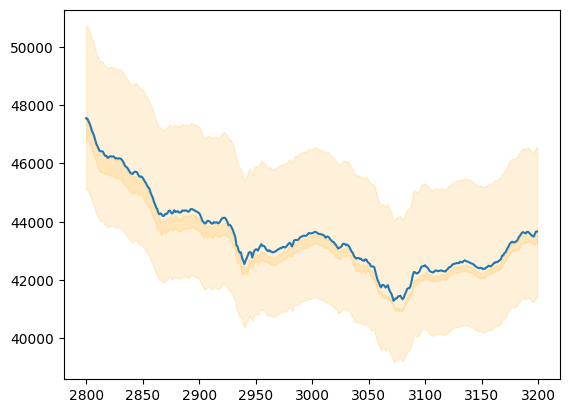

In [ ]:
bnn_before = pd.read_csv(data_path + 'bnn_results.csv')
plt.plot(bnn_before['pred'][start:end], label='bnn')
plt.fill_between(bnn_before.index[start:end], bnn_before['lower'][start:end], bnn_before['upper'][start:end], 
                 color='orange', alpha=.15, label='bnn CI')
plt.fill_between(bnn_data.index[start:end], bnn_data['lower'][start:end], bnn_data['upper'][start:end], 
                 color='orange', alpha=.15, label='bnn CI')

['8-31 15:30',
 '8-31 16:00',
 '8-31 16:30',
 '8-31 17:00',
 '8-31 17:30',
 '8-31 18:00',
 '8-31 18:30',
 '8-31 19:00',
 '8-31 19:30',
 '8-31 20:00',
 '8-31 20:30',
 '8-31 21:00',
 '8-31 21:30',
 '8-31 22:00',
 '8-31 22:30',
 '8-31 23:00',
 '8-31 23:30',
 '9-01 00:00',
 '9-01 00:30',
 '9-01 01:00',
 '9-01 01:30',
 '9-01 02:00',
 '9-01 02:30',
 '9-01 03:00',
 '9-01 03:30',
 '9-01 04:00',
 '9-01 04:30',
 '9-01 05:00',
 '9-01 05:30',
 '9-01 06:00',
 '9-01 06:30',
 '9-01 07:00',
 '9-01 07:30',
 '9-01 08:00']

In [ ]:
bnn_data['threshold_time_ms'][start:end:3].values

array(['2021-08-31 15:30:00', '2021-08-31 16:00:00',
       '2021-08-31 16:30:00', '2021-08-31 17:00:00',
       '2021-08-31 17:30:00', '2021-08-31 18:00:00',
       '2021-08-31 18:30:00', '2021-08-31 19:00:00',
       '2021-08-31 19:30:00', '2021-08-31 20:00:00',
       '2021-08-31 20:30:00', '2021-08-31 21:00:00',
       '2021-08-31 21:30:00', '2021-08-31 22:00:00',
       '2021-08-31 22:30:00', '2021-08-31 23:00:00',
       '2021-08-31 23:30:00', '2021-09-01 00:00:00',
       '2021-09-01 00:30:00', '2021-09-01 01:00:00',
       '2021-09-01 01:30:00', '2021-09-01 02:00:00',
       '2021-09-01 02:30:00', '2021-09-01 03:00:00',
       '2021-09-01 03:30:00', '2021-09-01 04:00:00',
       '2021-09-01 04:30:00', '2021-09-01 05:00:00',
       '2021-09-01 05:30:00', '2021-09-01 06:00:00',
       '2021-09-01 06:30:00', '2021-09-01 07:00:00',
       '2021-09-01 07:30:00', '2021-09-01 08:00:00'], dtype=object)